In [1]:
import gc

import pandas as pd
import numpy as np

import tensorflow as tf

import keras
from keras import models
from keras import activations

from datetime import datetime
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Data load

In [3]:
df = pd.read_csv('data/Modelar_UH2021_clean.txt', parse_dates=[0])

In [4]:
df.shape, df.columns

((1559222, 193),
 Index(['fecha', 'id', 'visitas', 'categoria_uno', 'categoria_dos', 'precio',
        'campaña', 'antiguedad', 'unidades_vendidas', 'dia_atipico_neg',
        ...
        'categoria_dos__96', 'categoria_dos__97', 'categoria_dos__98',
        'categoria_dos__nan', 'visitas_scl', 'weekday', 'weekday_sin',
        'weekday_cos', 'month_sin', 'month_cos'],
       dtype='object', length=193))

In [ ]:
_ = df[::100].hist(bins=20, figsize=[16,12])

## Data Preprocessing

In [54]:
gc.collect()

df.dropna(inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

X_cols = [
    'visitas_scl', 'precio', 'campaña',
#     'antiguedad',
    'dia_atipico_neg', 'dia_atipico_neu', 'dia_atipico_pos',
    'estado_no_rotura', 'estado_transito', 'estado_rotura',
    
    'categoria_uno__A', 'categoria_uno__B',
    'categoria_uno__C', 'categoria_uno__D', 'categoria_uno__E',
    'categoria_uno__F', 'categoria_uno__G', 'categoria_uno__H',
    'categoria_uno__I', 'categoria_uno__K', 'categoria_uno__L',
    'categoria_uno__N', 'categoria_uno__O', 'categoria_dos__0',
    'categoria_dos__1',
    
    'categoria_dos__114', 'categoria_dos__115', 'categoria_dos__116',
    'categoria_dos__122', 'categoria_dos__123', 'categoria_dos__124',
    'categoria_dos__125', 'categoria_dos__127', 'categoria_dos__131',
    'categoria_dos__133', 'categoria_dos__135', 'categoria_dos__136',
    'categoria_dos__137', 'categoria_dos__139', 'categoria_dos__14',
    'categoria_dos__143', 'categoria_dos__144', 'categoria_dos__145',
    'categoria_dos__149', 'categoria_dos__152', 'categoria_dos__153',
    'categoria_dos__155', 'categoria_dos__156', 'categoria_dos__157',
    'categoria_dos__158', 'categoria_dos__16',  'categoria_dos__161',
    'categoria_dos__165', 'categoria_dos__171', 'categoria_dos__174',
    'categoria_dos__175', 'categoria_dos__179', 'categoria_dos__181',
    'categoria_dos__182', 'categoria_dos__183', 'categoria_dos__186',
    'categoria_dos__188', 'categoria_dos__192', 'categoria_dos__195',
    'categoria_dos__197', 'categoria_dos__199', 'categoria_dos__2',
    'categoria_dos__212', 'categoria_dos__216', 'categoria_dos__217',
    'categoria_dos__22',  'categoria_dos__221', 'categoria_dos__223',
    'categoria_dos__224', 'categoria_dos__226', 'categoria_dos__228',
    'categoria_dos__229', 'categoria_dos__23',  'categoria_dos__233',
    'categoria_dos__235', 'categoria_dos__236', 'categoria_dos__237',
    'categoria_dos__238', 'categoria_dos__239', 'categoria_dos__242',
    'categoria_dos__243', 'categoria_dos__245', 'categoria_dos__247',
    'categoria_dos__248', 'categoria_dos__249', 'categoria_dos__253',
    'categoria_dos__255', 'categoria_dos__256', 'categoria_dos__258',
    'categoria_dos__259',    'categoria_dos__263',    'categoria_dos__264',
    'categoria_dos__266',    'categoria_dos__267',    'categoria_dos__268',
    'categoria_dos__269',    'categoria_dos__27',    'categoria_dos__271',
    'categoria_dos__273',    'categoria_dos__274',    'categoria_dos__275',
    'categoria_dos__276',    'categoria_dos__277',    'categoria_dos__278',
    'categoria_dos__28',    'categoria_dos__282',    'categoria_dos__285',
    'categoria_dos__286',    'categoria_dos__289',    'categoria_dos__29',
    'categoria_dos__292',    'categoria_dos__295',    'categoria_dos__296',
    'categoria_dos__298',    'categoria_dos__3',    'categoria_dos__312',
    'categoria_dos__314',    'categoria_dos__315',    'categoria_dos__316',
    'categoria_dos__319',    'categoria_dos__32',    'categoria_dos__323',
    'categoria_dos__326',    'categoria_dos__328',    'categoria_dos__329',
    'categoria_dos__331',    'categoria_dos__333',    'categoria_dos__336',
    'categoria_dos__338',    'categoria_dos__34',    'categoria_dos__341',
    'categoria_dos__342',    'categoria_dos__343',    'categoria_dos__36',
    'categoria_dos__37',    'categoria_dos__38',    'categoria_dos__39',
    'categoria_dos__4',    'categoria_dos__42',    'categoria_dos__43',
    'categoria_dos__44',    'categoria_dos__45',    'categoria_dos__46',
    'categoria_dos__49',    'categoria_dos__5',    'categoria_dos__51',
    'categoria_dos__54',    'categoria_dos__57',    'categoria_dos__6',
    'categoria_dos__63',    'categoria_dos__65',    'categoria_dos__66',
    'categoria_dos__67',    'categoria_dos__69',    'categoria_dos__7',
    'categoria_dos__71',    'categoria_dos__72',    'categoria_dos__73',
    'categoria_dos__75',    'categoria_dos__76',    'categoria_dos__78',
    'categoria_dos__79',    'categoria_dos__8',    'categoria_dos__82',
    'categoria_dos__84',    'categoria_dos__85',    'categoria_dos__86',
    'categoria_dos__89',    'categoria_dos__9',    'categoria_dos__92',
    'categoria_dos__93',    'categoria_dos__95',    'categoria_dos__96',
    'categoria_dos__97',    'categoria_dos__98',
    'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'
]

y_cols = ['unidades_vendidas']

X = df[X_cols]
y = df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler, RobustScaler, PowerTransformer

class LogScaler(object):
    def fit_transform(self, data):
        return self.transform(data)
    
    def transform(self, data):
        return np.log(data+1)
    
    def inverse_transform(self, data):
        return np.exp(data)-1

# X Scaling
X_scaler = RobustScaler(quantile_range=[5,95])

X_train_scl = X_train
X_test_scl = X_test

X_cols_to_std = ['precio', 'visitas_scl']

X_train_scl[X_cols_to_std] = X_scaler.fit_transform(X_train[X_cols_to_std])
X_test_scl[X_cols_to_std] = X_scaler.transform(X_test[X_cols_to_std])

# Y Scaling to 99.9% quantile

# y_scaler = MinMaxScaler()
# y_max = y_train.unidades_vendidas.quantile(.9995)
# y_train[y_train > y_max] = y_max
# y_test[y_train > y_max] = y_max

# Custom scaler

y_scaler = RobustScaler(quantile_range=[5,95])

y_train_scl = y_scaler.fit_transform(y_train)
y_test_scl = y_scaler.transform(y_test)

In [10]:
X_train_scl.describe().round(2)

,visitas_scl,precio,campaña,dia_atipico_neg,dia_atipico_neu,dia_atipico_pos,estado_no_rotura,estado_transito,estado_rotura,categoria_uno__A,...,categoria_dos__92,categoria_dos__93,categoria_dos__95,categoria_dos__96,categoria_dos__97,categoria_dos__98,weekday_sin,weekday_cos,month_sin,month_cos
count,1403299.00,1403299.00,1403299.00,1403299.00,1403299.00,1403299.0,1403299.00,1403299.00,1403299.00,1403299.00,...,1403299.00,1403299.00,1403299.00,1403299.00,1403299.00,1403299.0,1403299.00,1403299.00,1403299.00,1403299.00
mean,0.20,0.12,0.00,0.03,0.86,0.1,0.87,0.01,0.12,0.37,...,0.00,0.00,0.00,0.00,0.01,0.0,-0.00,0.00,-0.11,-0.18
std,1.32,0.33,0.07,0.18,0.34,0.3,0.33,0.11,0.32,0.48,...,0.04,0.05,0.02,0.02,0.08,0.0,0.71,0.71,0.68,0.70
min,-0.07,-0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,-0.97,-0.90,-1.00,-1.00
25%,-0.05,-0.12,0.00,0.00,1.00,0.0,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,-0.78,-0.90,-0.77,-0.87
50%,0.00,0.00,0.00,0.00,1.00,0.0,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-0.22,-0.18,-0.34
75%,0.13,0.27,0.00,0.00,1.00,0.0,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.78,0.62,0.48,0.49
max,456.51,2.16,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.0,0.97,1.00,1.00,1.00


In [16]:
pd.Series(y_scaler.inverse_transform(y_train_scl[::13])[:,0])

0          0.0
1         18.0
2         30.0
3          0.0
4          0.0
          ... 
107942     0.0
107943     0.0
107944     0.0
107945     0.0
107946     0.0
Length: 107947, dtype: float64

In [53]:
# Visual inspection of y values
pd.concat([
    pd.Series(y_train[::13].values[:,0]),
    pd.Series(y_train_scl[::13][:,0]),
    pd.Series(y_scaler.inverse_transform(y_train_scl[::13])[:,0])
], axis=1)[::50]

,0,1,2
0,0,0.000000,0.0
50,3,0.166667,3.0
100,0,0.000000,0.0
150,0,0.000000,0.0
200,0,0.000000,0.0
...,...,...,...
107700,18,1.000000,18.0
107750,0,0.000000,0.0
107800,3,0.166667,3.0
107850,0,0.000000,0.0


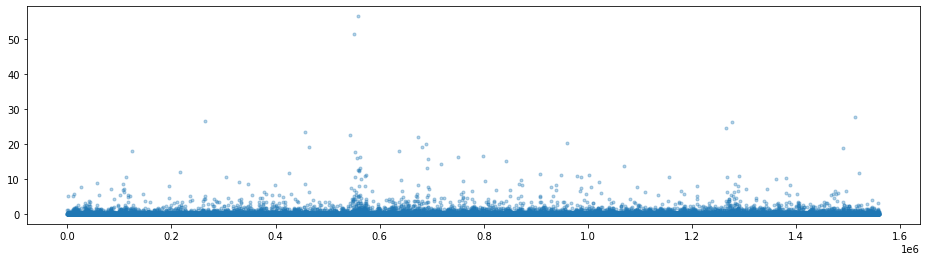

In [51]:
plt.figure(figsize=[16,4])
plt.scatter(X_train.index[::50], y_train_scl[::50], marker=".", alpha=0.33)

# NN Model

In [54]:
from keras import backend as K
from tensorflow import convert_to_tensor

# KERAS RMSE
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
# CAJAMAR SCORING
def rrmse(y, yhat):
    return K.sqrt( K.mean(K.square(y - yhat)) ) / K.mean(y)

def cf(y, yhat):
    return K.mean(K.clip(yhat-(y-1), 0, 1))

def inverse_cf(y, yhat):
    return 1 - K.mean(K.clip(yhat-(y-1), 0, 1))

def score(y,yhat):
    y = K.constant(y)
    yhat = K.constant(yhat)
    return (0.7 * rrmse(y,yhat)) + (0.3 * (1 - cf(y,yhat)))

def y_scaled_score(y_true, y_pred):
    global y_scaler
    return score(y_scaler.inverse_transform(y_true), scaler.inverse_transform(y_pred))

In [57]:
y = np.array([0, 3, 1], dtype=np.float32)
yhat = np.array([1, 4, 2], dtype=np.float32)

score(y,yhat)

<tf.Tensor: shape=(), dtype=float32, numpy=0.525>

In [58]:
gc.collect()

10986

In [59]:
from keras.layers import Dense, Dropout, BatchNormalization

FEAT_DIM = len(X.columns)

gc.collect()

model = models.Sequential()

model.add(Dense(FEAT_DIM*8, input_dim=FEAT_DIM, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(FEAT_DIM*6, activation='relu'))
model.add(Dropout(0.1))

# model.add(BatchNormalization())
model.add(Dense(FEAT_DIM*5, activation='relu'))
model.add(Dense(FEAT_DIM*4, activation='relu'))
model.add(Dense(FEAT_DIM*3, activation='relu'))
model.add(Dense(FEAT_DIM*2, activation='relu'))
# model.add(Dense(FEAT_DIM*16, activation='relu'))
# OUTPUT
model.add(Dense(1, activation="linear"))


# Early Stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# es = keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=50)
# Store best model
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.compile(loss="mae", optimizer='adam', metrics=[y_scaled_score])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1464)              269376    
_________________________________________________________________
dropout (Dropout)            (None, 1464)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1098)              1608570   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1098)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 915)               1005585   
_________________________________________________________________
dense_3 (Dense)              (None, 732)               670512    
_________________________________________________________________
dense_4 (Dense)              (None, 549)               4

In [60]:
history = model.fit(X_train_scl, y_train_scl, epochs=1000, batch_size=200,
    callbacks=[es, mc],
    validation_data=(X_test_scl, y_test_scl)
)

Epoch 1/1000
7011/7017 [============================>.] - ETA: 0s - loss: 0.1670
Epoch 00001: val_loss improved from inf to 0.15676, saving model to best_model.h5
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1670 - val_loss: 0.1568
Epoch 2/1000
7009/7017 [============================>.] - ETA: 0s - loss: 0.1611
Epoch 00002: val_loss improved from 0.15676 to 0.15562, saving model to best_model.h5
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1612 - val_loss: 0.1556
Epoch 3/1000
7007/7017 [============================>.] - ETA: 0s - loss: 0.1598
Epoch 00003: val_loss did not improve from 0.15562
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1597 - val_loss: 0.1561
Epoch 4/1000
7011/7017 [============================>.] - ETA: 0s - loss: 0.1583
Epoch 00004: val_loss did not improve from 0.15562
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1583 - val_loss: 0.1580
Epoch 5/1000
7009/7017 [==============

Epoch 36/1000
7014/7017 [============================>.] - ETA: 0s - loss: 0.1497
Epoch 00036: val_loss did not improve from 0.14894
7017/7017 [==============================] - 27s 4ms/step - loss: 0.1497 - val_loss: 0.1490
Epoch 37/1000
7010/7017 [============================>.] - ETA: 0s - loss: 0.1494
Epoch 00037: val_loss improved from 0.14894 to 0.14857, saving model to best_model.h5
7017/7017 [==============================] - 27s 4ms/step - loss: 0.1494 - val_loss: 0.1486
Epoch 38/1000
7009/7017 [============================>.] - ETA: 0s - loss: 0.1493
Epoch 00038: val_loss did not improve from 0.14857
7017/7017 [==============================] - 27s 4ms/step - loss: 0.1493 - val_loss: 0.1494
Epoch 39/1000
7016/7017 [============================>.] - ETA: 0s - loss: 0.1488
Epoch 00039: val_loss did not improve from 0.14857
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1488 - val_loss: 0.1494
Epoch 40/1000
7009/7017 [============================>.] - ETA: 0

7016/7017 [============================>.] - ETA: 0s - loss: 0.1456
Epoch 00071: val_loss did not improve from 0.14758
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1456 - val_loss: 0.1483
Epoch 72/1000
7016/7017 [============================>.] - ETA: 0s - loss: 0.1456
Epoch 00072: val_loss did not improve from 0.14758
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1456 - val_loss: 0.1476
Epoch 73/1000
7007/7017 [============================>.] - ETA: 0s - loss: 0.1458
Epoch 00073: val_loss did not improve from 0.14758
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1458 - val_loss: 0.1480
Epoch 74/1000
7005/7017 [============================>.] - ETA: 0s - loss: 0.1455
Epoch 00074: val_loss did not improve from 0.14758
7017/7017 [==============================] - 26s 4ms/step - loss: 0.1455 - val_loss: 0.1479
Epoch 75/1000
7007/7017 [============================>.] - ETA: 0s - loss: 0.1454
Epoch 00075: val_loss did not im

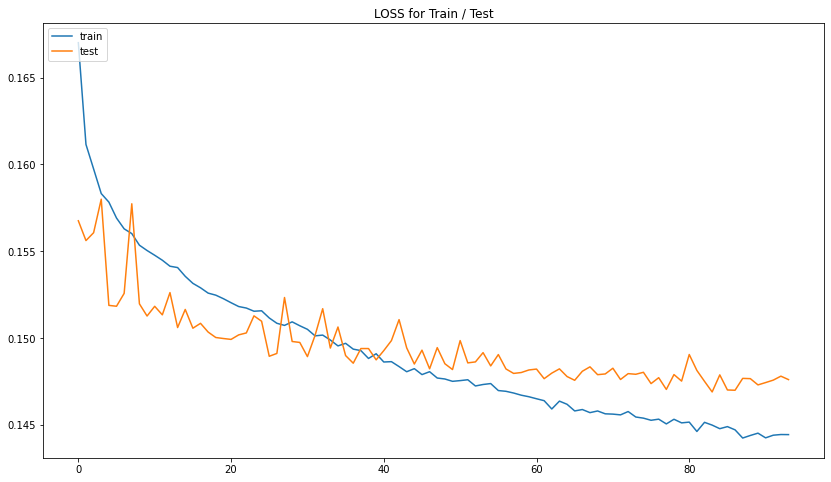

In [62]:
plt.figure(figsize=[14,8])
# plt.ylim((0.85,0.98))

plt.title('LOSS for Train / Test')

train_acc = history.history['loss']
test_acc = history.history['val_loss']

plt.plot(train_acc)
plt.plot(test_acc)
# plt.plot([max(train_acc)] * len(train_acc))
# plt.plot([max(test_acc)] * len(test_acc))

plt.legend(['train', 'test'], loc='upper left')

## Model Scoring

### Scoring Functions

In [25]:
def rrmse(y,yhat):
    return np.sqrt(np.sum(np.power(y-yhat,2))/y.shape[0])/y.mean()

def cf(y,yhat):
    rotura=np.where(yhat >= y, 1, 0)
    return rotura.mean()

def score(y,yhat):
    return (0.7*rrmse(y,yhat))+(.3*(1-cf(y,yhat)))

### Load Best model

In [11]:
from keras.models import load_model

best_model = load_model('best_model.h5', compile = False)

y_hat = best_model.predict(X_test)
y_hat_real = y_scaler.inverse_transform(y_hat)

### General error over the range

In [63]:
y_hat = model.predict(X_test)
y_hat_real = y_scaler.inverse_transform(y_hat)

<tf.Tensor: shape=(), dtype=float32, numpy=2.1559298>

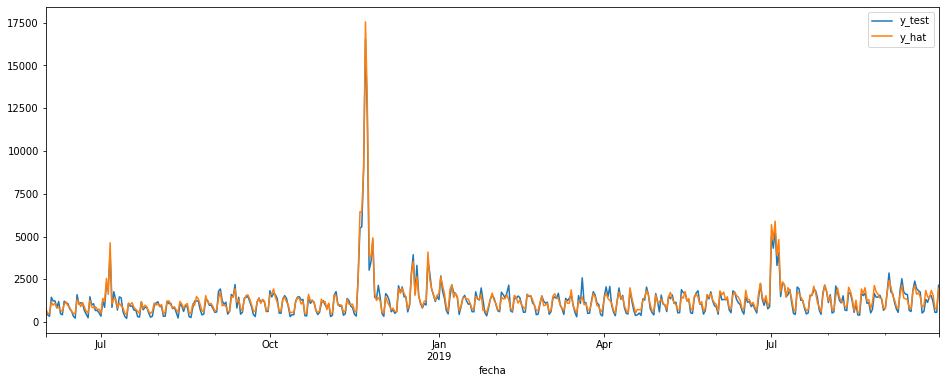

In [89]:
df_y_hat = pd.DataFrame()

df_y_hat['fecha'] = df.loc[X_test.index].fecha
# df_y_hat['visitas'] = X_test.visitas_scl
df_y_hat['y_test'] = y_test
df_y_hat['y_hat'] = ((y_hat_real * 1.2).round(0) ) + 1

df_y_hat.groupby('fecha').sum().plot(figsize=[16,6])

# y_hat_real += np.where(y_hat_real <= 0, 1, 1)
score(df_y_hat.y_test, df_y_hat.y_hat)

### Black Friday OOS Test

<tf.Tensor: shape=(), dtype=float32, numpy=2.3985941>

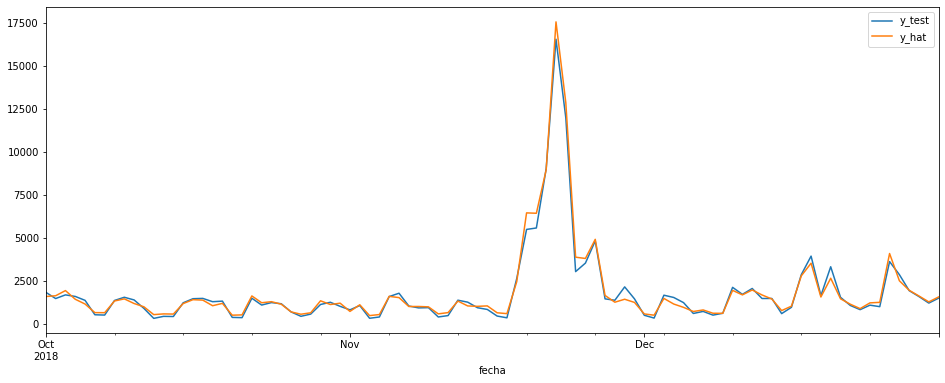

In [87]:
# Black friday dates
bf_index = (df_y_hat.fecha >= datetime(2018,10,1)) & (df_y_hat.fecha <= datetime(2018,12,31))

df_bf = df_y_hat[bf_index]
df_bf.groupby('fecha').sum().plot(figsize=[16,6])

score(df_bf.y_test, df_bf.y_hat)

In [26]:
y_hat = model.predict(X_test_bf)

y_hat_real = y_scaler.inverse_transform(y_hat)
y_hat_real += np.where(y_hat_real <= 0, 1, 1)

score(y_test_bf.values, y_hat_real.round(0))

<tf.Tensor: shape=(), dtype=float32, numpy=2.87241>

In [ ]:
plt.scatter(range(len(y_hat_real)), y_hat_real)
plt.figure()
plt.scatter(range(len(y_hat_real)), y_test)